

image.png

# **Análise Exploratória**



"A análise exploratória é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais."

A etapa de análise exploratória é importante antes de realizar uma análise de série temporal, pois:

1. **Compreensão dos Dados:** Antes de aplicar técnicas de análise de série temporal, é crucial entender os dados que você está lidando. A análise exploratória permite que você conheça as características das variáveis, suas distribuições, tendências e possíveis padrões.

2. **Identificação de Problemas:** Durante a exploração, você pode detectar problemas nos dados, como valores ausentes, outliers ou inconsistências. Esses problemas podem afetar os resultados da análise de série temporal, e é importante resolvê-los antes de prosseguir.

3. **Seleção de Variáveis:** Se o seu conjunto de dados tiver várias colunas, você precisa decidir quais variáveis são relevantes para sua análise de série temporal. A exploração ajuda a identificar as colunas de interesse e a entender como elas se relacionam com o tempo.

4. **Tendências e Padrões:** A análise exploratória pode revelar tendências temporais e padrões sazonais, que são informações valiosas para modelar a série temporal. Identificar tendências crescentes, decrescentes ou flutuações sazonais pode influenciar as escolhas dos métodos de análise e modelagem.

5. **Estacionariedade:** A estacionariedade é uma propriedade importante em análise de série temporal, pois muitos modelos assumem que as séries são estacionárias. Através da exploração, você pode verificar se a série é estacionária ou se precisa de transformações para torná-la estacionária.

6. **Definição de Parâmetros:** Muitos modelos de série temporal têm parâmetros que precisam ser definidos. A análise exploratória pode fornecer insights sobre possíveis valores de parâmetros, ajudando na configuração adequada dos modelos.

7. **Visualização:** A exploração gráfica, como gráficos de linha, histogramas, e decomposição de série temporal, ajuda a visualizar o comportamento dos dados ao longo do tempo. Essas visualizações auxiliam na identificação de padrões visuais.

8. **Validação de Suposições:** A exploração permite validar suposições que você pode fazer sobre os dados antes de aplicar modelos. Isso ajuda a garantir que os métodos de análise escolhidos sejam apropriados para o conjunto de dados em questão.

Em resumo, a análise exploratória fornece uma base sólida para a análise de série temporal, ajudando a tomar decisões informadas sobre quais métodos e abordagens usar, bem como a entender melhor as características e comportamentos dos dados ao longo do tempo.

## **Importação de Bibliotecas e Carregamento dos Dados**


Caminho para o DataFrame: https://drive.google.com/drive/u/0/folders/1FCFL9MWV0HAc8w9PpepAU_Z3t38o2it4 (*)

A descrição do conjunto de dados é bem simples. uma tabela de excel com 144 linhas e 2 colunas, sendo a 1° uma marcação de tempo mês/ano e a 2° com o número de passageiros totais do período.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar o conjunto de dados
data = pd.read_csv("AirPassengers.csv")

# Mostrar as primeiras linhas do conjunto de dados
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## **Exploração Inicial**

In [ ]:
# Obter informações sobre as colunas e tipos de dados
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


**Entendendo o retorno:**

*   O DataFrame possui 144 entradas.
*   Existem duas colunas chamadas 'Month' e '#Passengers'.
*   'Month' é do tipo *object* (string que representa datas).
*   '#Passengers' é do tipo *int64* (números inteiros).
*   Em ambos os casos '144 non-null' significa que não há valores faltantes.
*   O uso de memória estimado é cerca de ≈2.4 KB.

Essas informações ajudam a ter uma visão geral rápida do seu conjunto de dados e a identificar possíveis problemas, como valores nulos em colunas, que tipo de dados está sendo usado e se as colunas de data estão corretamente identificadas.

In [ ]:
# Resumo estatístico das colunas numéricas
print(data.describe())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


Esse resumo fornece informações estatísticas sobre a distribuição dos dados em cada coluna numérica.

* Contagem (count): O número de valores não nulos em cada coluna. Isso mostra quantos valores estão presentes e ajuda a identificar valores ausentes.

* Média (mean): A média aritmética dos valores presentes em cada coluna.

* Desvio Padrão (std): O desvio padrão, que mede a dispersão dos valores em relação à média. Valores mais altos indicam maior variabilidade.

* Valor Mínimo (min): O menor valor presente em cada coluna.

* Percentil 25 (25%): O valor abaixo do qual 25% dos dados estão localizados. Também conhecido como primeiro quartil.

* Mediana (50%): O valor do meio quando os dados estão organizados em ordem crescente. Também conhecida como segundo quartil ou valor médio.

* Percentil 75 (75%): O valor abaixo do qual 75% dos dados estão localizados. Também conhecido como terceiro quartil.

* Valor Máximo (max): O maior valor presente em cada coluna.


**Outliers**

Para avaliar a presença de outliers, pode-se calcular o intervalo interquartil (IQR), que é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1): IQR = Q3 - Q1.
Qualquer valor abaixo de Q1 - (1.5 * IQR) ou acima de Q3 + (1.5 * IQR) é considerado um outlier.

Calculo do IQR:

IQR = 360.5 - 180 = 180.5

Agora, calcula-se os limites inferior e superior para identificar possíveis outliers:

* Limite Inferior: Q1 - 1.5 * IQR = 180 - 1.5 * 180.5 ≈ -90.75 (Como os valores só fazem sentido até o 0 marca-se até esse ponto.)

* Limite Superior: Q3 + 1.5 * IQR = 360.5 + 1.5 * 180.5 ≈ 631.25

Como o valor mínimo é 104 e o valor máximo é 622, ambos estão dentro dos limites. Portanto, concluimos que não há outliers nesse conjunto de dados.

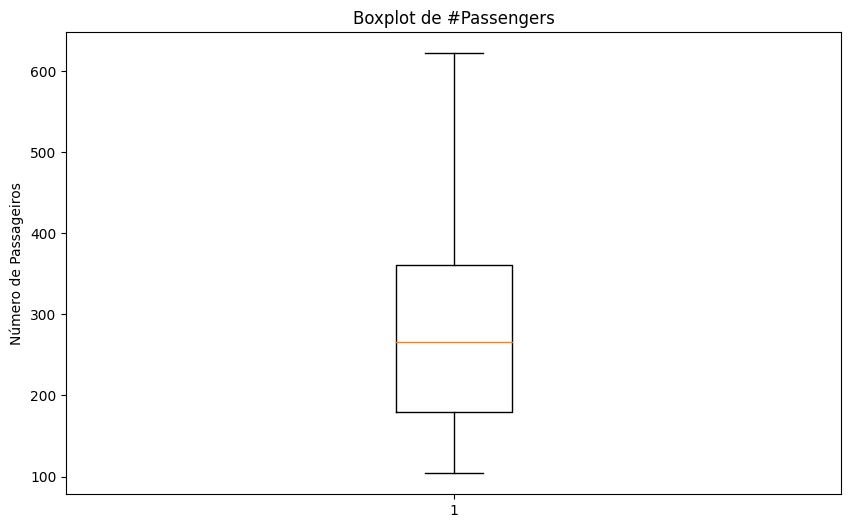

In [ ]:
# BoxPlot
plt.figure(figsize=(10, 6))
plt.boxplot(data['#Passengers'])
plt.title('Boxplot de #Passengers')
plt.ylabel('Número de Passageiros')
plt.show()

In [ ]:
# Verificar valores nulos em cada coluna
print(data.isnull().sum())

Month          0
#Passengers    0
dtype: int64


Esse retorno é útil para entender a presença de dados ausentes ou valores faltantes nas diferentes colunas. A saída desse código mostra quantos valores nulos estão em cada coluna.

No caso, ambas as colunas não apresentam nenhum valor nulo

## **Preparação dos Dados**



In [ ]:
#renomeando e reindexando
data['Date'] = pd.to_datetime(data['Month'])
data = data.drop(columns='Month')
data = data.set_index('Date')
data = data.rename(columns={'#Passengers':'Passengers'})

Neste bloco se está convertendo a coluna de datas para o tipo de dados *datetime* e definindo a coluna de datas como o índice do DataFrame. Isso é importante porque permite que o Pandas reconheça e trabalhe com as datas de forma mais eficaz, além de ser crucial em análise de série temporal.


## **Visualização da série**

In [ ]:
#criando funcao de plotagem da serie
def plot_ts(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

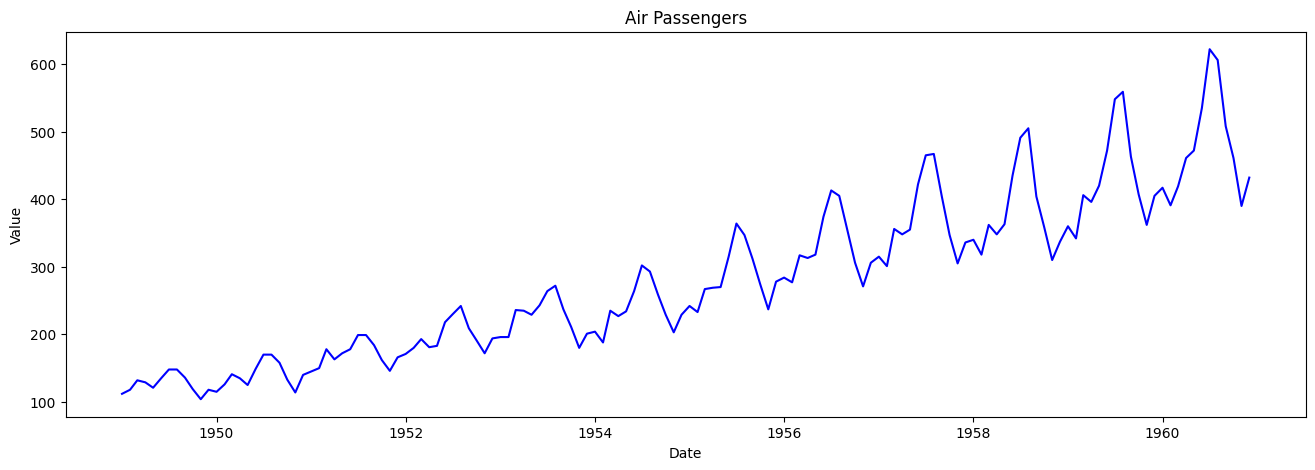

In [ ]:
plot_ts(data, x=data.index, y=data["Passengers"], title="Air Passengers")

Interpretação:

* Tendência: Observa-se uma tendência de crescimento ao longo dos anos. Isso indica que o número de passageiros aumentou à medida que o tempo avançou. Essa é uma informação importante para análises de séries temporais, pois pode sugerir que há uma componente de tendência que deve ser considerada ao modelar os dados.

* Sazonalidade: Além da tendência, há flutuações sazonais perceptíveis. Os picos e vales que se repetem em padrões regulares indicam sazonalidade. No caso desse conjunto de dados de passageiros de companhias aéreas, é comum que haja um aumento de passageiros em determinadas épocas do ano, como férias ou feriados. Essa sazonalidade é uma característica importante a ser considerada ao analisar e modelar os dados.

* Variações Irregulares: Além da tendência e da sazonalidade, também há variações irregulares nos dados. Essas variações podem ser devido a fatores aleatórios, eventos especiais, mudanças na indústria ou em outras variáveis que afetam o número de passageiros.

## **Decomposição**

Utilizar métodos de decomposição, como a decomposição clássica (por exemplo, decomposição aditiva ou multiplicativa) ou decomposição STL (Seasonal and Trend decomposition using Loess), disponíveis em bibliotecas como statsmodels ou seasonal_decompose do pacote statsmodels.tsa, para separar os componentes principais da série (tendência, sazonalidade e componente de erro).

**Quando usar o modelo aditivo ou o modelo multiplicativo?**

*   **Modelo multiplicativo:** quando as variações em torno da tendência estão relacionadas ao nível da série temporal. Isso significa que as mudanças percentuais (ou proporcionais) na série são constantes em cada período do ciclo

*   Y[t] = Tendência[t] * Sazonalidade[t] * Ciclo[t] * Erro[t]

*   o resíduo (ou erro) representa a razão entre o valor observado e o valor previsto pela tendência e pelos componentes sazonais e cíclicos

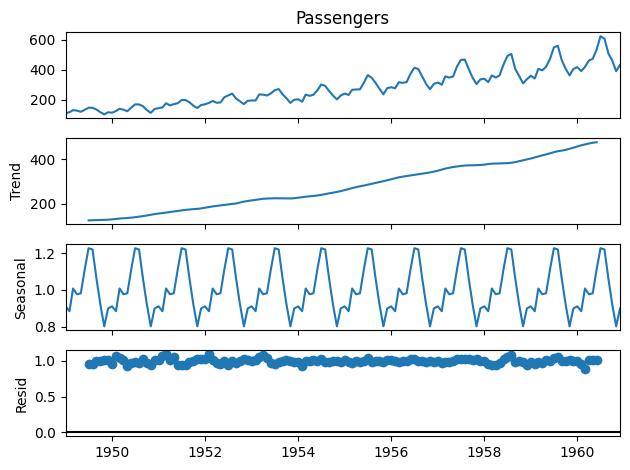

In [ ]:
dec = sm.tsa.seasonal_decompose(data['Passengers'],period = 12, model = 'multiplicative').plot()
plt.show()

*  **Modelo aditivo:** quando as variações em torno da tendência são constantes em termos absolutos, independentemente do nível da série temporal. Isso significa que as mudanças absolutas na série são constantes em cada período do ciclo
*  Y[t] = Tendência[t] + Sazonalidade[t] + Ciclo[t] + Erro[t]
*  o resíduo (ou erro) representa a diferença entre o valor observado e o valor previsto pela tendência e pelos componentes sazonais e cíclicos

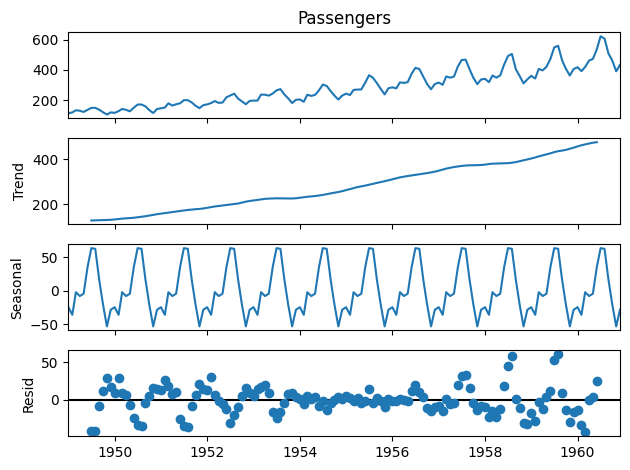

In [ ]:
dec = sm.tsa.seasonal_decompose(data['Passengers'],period = 12, model = 'additive').plot()
plt.show()

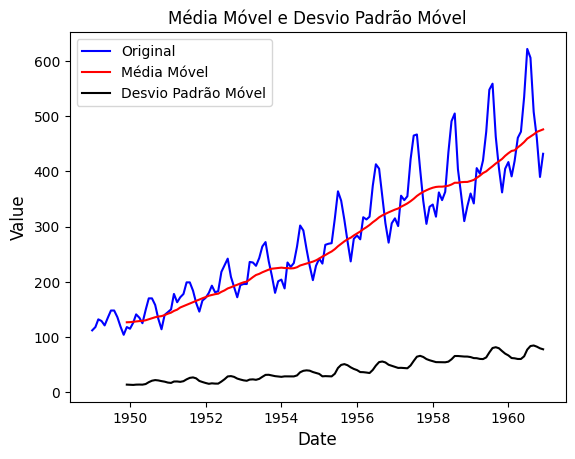

In [ ]:
# calculando e plotando o valor original da serie, juntamente com sua media móvel e desvio padreo móvel
def rolling_stats(data):
    rolling_mean = data.rolling(window = 12).mean()
    rolling_std = data.rolling(window = 12).std()
    plt.plot(data, color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = 'Média Móvel')
    plt.plot(rolling_std, color = 'black', label = 'Desvio Padrão Móvel')
    plt.xlabel('Date', size = 12)
    plt.ylabel('Value', size  = 12)
    plt.legend(loc = 'best')
    plt.title('Média Móvel e Desvio Padrão Móvel')
    plt.show()

rolling_stats(data)